Output()

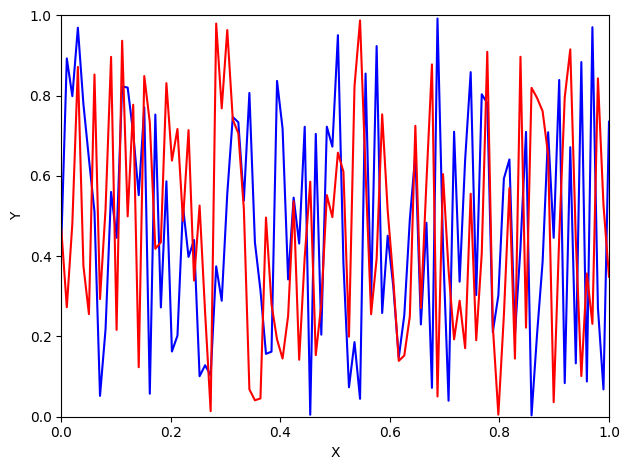

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import threading
import time

from IPython.display import display
import ipywidgets as widgets

settings = threading.local()
settings.resume_event = threading.Event()
settings.hertz = 1

toggle_buttons = widgets.ToggleButtons(options = ["Pause", "Resume"], index = 1)
def on_toggle_changed(value):
    if "Pause" == toggle_buttons.value:
        settings.resume_event.clear()
    elif "Resume" == toggle_buttons.value:
        settings.resume_event.set()
toggle_buttons.observe(on_toggle_changed, names = "value")

int_range = widgets.IntSlider(min = 1, max = 12, value = 1)
def on_value_change(change):
    settings.hertz = change["new"]
int_range.observe(on_value_change, names = "value")

settings.box = widgets.VBox([
    widgets.HBox([toggle_buttons]),
    widgets.HBox([widgets.Label('Refresh rate [Hz]'), int_range])
])
display(settings.box, widgets.Output())

def start_animation(settings):
    (fig, ax) = plt.subplots(1, 1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    fig.tight_layout()
    hdisplay = display("", display_id = True)

    def pltsin(ax, *, hdisplay, colors=["b"]):
        x = np.linspace(0, 1, 100)
        if ax.lines:
            for line in ax.lines:
                line.set_xdata(x)
                y = np.random.random(size = (100, 1))
                line.set_ydata(y)
        else:
            for color in colors:
                y = np.random.random(size = (100, 1))
                ax.plot(x, y, color)
        hdisplay.update(fig)

    while True:
        settings["resume_event"].wait()
        pltsin(ax, colors=["b", "r"], hdisplay = hdisplay)
        time.sleep(1.0 / settings["hertz"])

t = threading.Thread(target = start_animation, args = [settings.__dict__])
t.start()
settings.resume_event.set()
